# Author: Sahil Arvind Bote

## Task 1: Image to Pencil Sketch with Python

In [1]:
#Import libraries
import numpy as np
import cv2
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
def show_image(img):
    cv2.imshow('Image' , img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
#Load Image
img = cv2.imread(r'input_img.png')

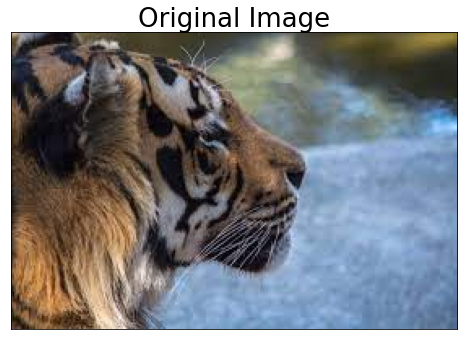

In [4]:
#Display Image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [5]:
def dodgeV2(image, mask):
    return cv2.divide(image, 255-mask, scale=256)

In [6]:
def blend(front,back):
    result=front*255/(255-back)  
    result[result>255]=255 
    result[back==255]=255 
    return result

In [7]:
#Convert to gray image
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

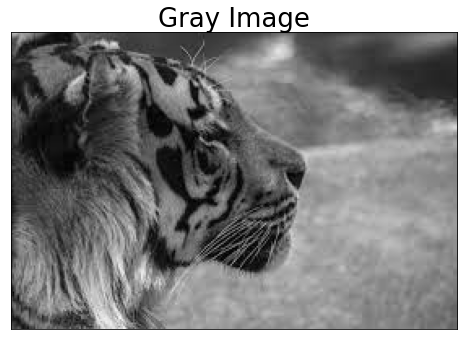

In [8]:
#Display image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(img_gray, cv2.COLOR_BGR2RGB))
plt.title('Gray Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [9]:
#Applying gaussian blur to grayscale image
img_blur = cv2.GaussianBlur(img_gray, (21,21), 0, 0)

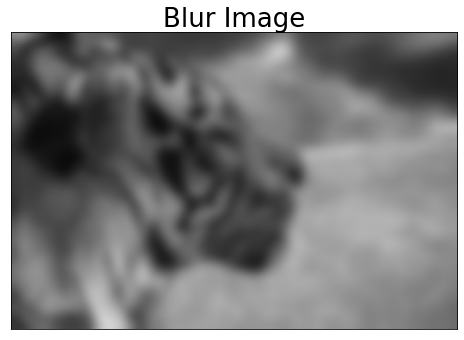

In [10]:
#Display image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
plt.title('Blur Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()    

In [11]:
#Invert the blur image
inverted_img = 255 - img_blur

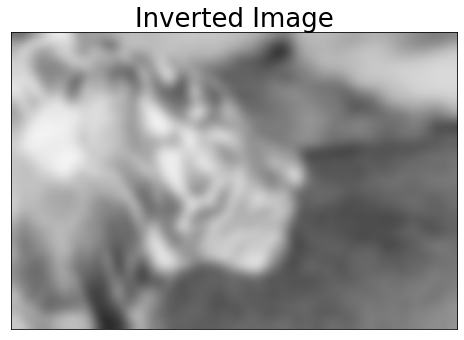

In [12]:
#Display image
plt.figure(num = 1, figsize=(8,8))
plt.imshow(cv2.cvtColor(inverted_img, cv2.COLOR_BGR2RGB))
plt.title('Inverted Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()    

In [13]:
#Apply the dodgeV2 function
img_blend = dodgeV2(img_gray,inverted_img)

In [14]:
#Blend the image
img_final = 1-blend(img_blend,img_gray)
final_image = img_final

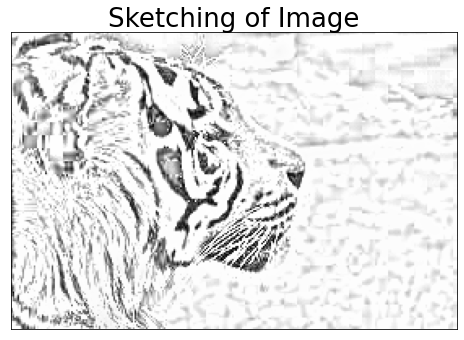

In [15]:
#Display output
plt.figure(figsize=(8,8))
plt.imshow(final_image, cmap="gray")
plt.title('Sketching of Image', fontsize=26)
plt.gca().axes.get_yaxis().set_visible(False)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [16]:
cv2.imwrite('output_img.png', (final_image))

True